<a href="https://colab.research.google.com/github/Jacquedelest/Online-Shopping-Intention/blob/master/Machine_Learning_for_Online_Shopping_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [105]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# Data Exploratory

Import dataset

In [2]:
dataset = pd.read_csv('online_shoppers_intention.csv')

Check size of dataframe

In [4]:
print('Shape dataset:', dataset.shape)

Shape dataset: (12330, 18)


In [32]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [31]:
dataset.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,0.111111,0.042663,0.0,0.0,0.075177,0.027883,0.035714,0.145153,0.033839,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0.000000,0.000000,0.0,0.0,0.007092,0.007280,0.000000,0.106667,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0.000000,0.000000,0.0,0.0,0.008511,0.002880,0.416667,0.433333,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,0.148148,0.022067,0.0,0.0,0.021277,0.005408,0.000000,0.105263,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0.000000,0.000000,0.0,0.0,0.004255,0.000332,0.000000,0.333333,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


Data Set Information:

The dataset consists of feature vectors belonging to 12,330 sessions.
The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid
any tendency to a specific campaign, special day, user
profile, or period.

Attribute Information:

The dataset consists of 10 numerical and 8 categorical attributes.
The `Revenue` attribute can be used as the class label.

`Administrative`, `Administrative Duration`, `Informational`, `Informational Duration`, `Product Related` and `Product Related Duration` represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. 

The `Bounce Rate`,`Exit Rate` and `Page Value` features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of `Bounce Rate` feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of `Exit Rate` feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The `Page Value` feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 

The `Special Day` feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

Check information about dataframe

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

See descriptive statistics of dataframe

In [7]:
#numerical columns
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [8]:
#categorical columns
dataset.describe(include='O')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


See unique values of categorical columns

In [67]:
print("Month unique values\t\t\t", dataset['Month'].unique())
print("Visitor Type unique values\t\t", dataset['VisitorType'].unique())
print("Operating Systems unique values\t", dataset['OperatingSystems'].unique())
print("Browser unique values\t\t\t", dataset['Browser'].unique())
print("Region unique values\t\t\t", dataset['Region'].unique())
print("Traffic Type unique values\t\t", dataset['TrafficType'].unique())
print("Special Day unique values\t\t", dataset['SpecialDay'].unique())

Month unique values			 ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
Visitor Type unique values		 ['Returning_Visitor' 'New_Visitor' 'Other']
Operating Systems unique values	 [1 2 4 3 7 6 8 5]
Browser unique values			 [ 1  2  3  4  5  6  7 10  8  9 12 13 11]
Region unique values			 [1 9 2 3 4 5 6 7 8]
Traffic Type unique values		 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 16 17 20]
Special Day unique values		 [0.  0.4 0.8 1.  0.2 0.6]


See columns correlation

In [23]:
dataset.corr()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561,0.026417,0.138917
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376,0.014990,0.093587
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491,0.035785,0.095200
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675,0.024078,0.070345
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064,0.016092,0.158538
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377,0.007311,0.152373
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286,-0.046514,-0.150673
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616,-0.062587,-0.207071
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532,0.012002,0.492569
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301,-0.016767,-0.082305


In [19]:
#visualization of dataframe correlation
dataset.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1.0,0.6,0.38,0.26,0.43,0.37,-0.22,-0.32,0.099,-0.095,-0.0063,-0.025,-0.0055,-0.034,0.026,0.14
Administrative_Duration,0.6,1.0,0.3,0.24,0.29,0.36,-0.14,-0.21,0.068,-0.073,-0.0073,-0.015,-0.0056,-0.014,0.015,0.094
Informational,0.38,0.3,1.0,0.62,0.37,0.39,-0.12,-0.16,0.049,-0.048,-0.0095,-0.038,-0.029,-0.034,0.036,0.095
Informational_Duration,0.26,0.24,0.62,1.0,0.28,0.35,-0.074,-0.11,0.031,-0.031,-0.0096,-0.019,-0.027,-0.025,0.024,0.07
ProductRelated,0.43,0.29,0.37,0.28,1.0,0.86,-0.2,-0.29,0.056,-0.024,0.0043,-0.013,-0.038,-0.043,0.016,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1.0,-0.18,-0.25,0.053,-0.036,0.003,-0.0074,-0.033,-0.036,0.0073,0.15
BounceRates,-0.22,-0.14,-0.12,-0.074,-0.2,-0.18,1.0,0.91,-0.12,0.073,0.024,-0.016,-0.0065,0.078,-0.047,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1.0,-0.17,0.1,0.015,-0.0044,-0.0089,0.079,-0.063,-0.21
PageValues,0.099,0.068,0.049,0.031,0.056,0.053,-0.12,-0.17,1.0,-0.064,0.019,0.046,0.011,0.013,0.012,0.49
SpecialDay,-0.095,-0.073,-0.048,-0.031,-0.024,-0.036,0.073,0.1,-0.064,1.0,0.013,0.0035,-0.016,0.052,-0.017,-0.082


In [21]:
dataset_corr = dataset.corr()
print('BounceRates-ExitRates Correlation:', dataset_corr.loc['BounceRates', 'ExitRates'])
print('Revenue-PageValues Correlation:', dataset_corr.loc['Revenue', 'PageValues'])
print('TrafficType-Weekend Correlation:', dataset_corr.loc['TrafficType', 'Weekend'])

BounceRates-ExitRates Correlation: 0.9130043961814553
Revenue-PageValues Correlation: 0.49256929525114623
TrafficType-Weekend Correlation: -0.0022212292430307825


See data distribution of customers on Revenue

In [17]:
print('Distribusi Label (Revenue):')
dataset['Revenue'].value_counts()

Distribusi Label (Revenue):


False    10422
True      1908
Name: Revenue, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'count')

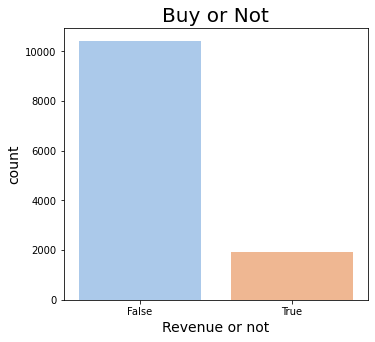

In [24]:
#visualization of the distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize =14)
plt.ylabel('count', fontsize = 14)

See distribution of customers on Weekend

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


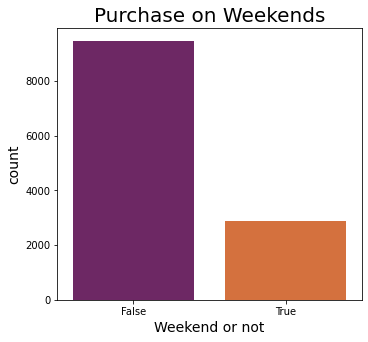

In [26]:
#visualization the distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

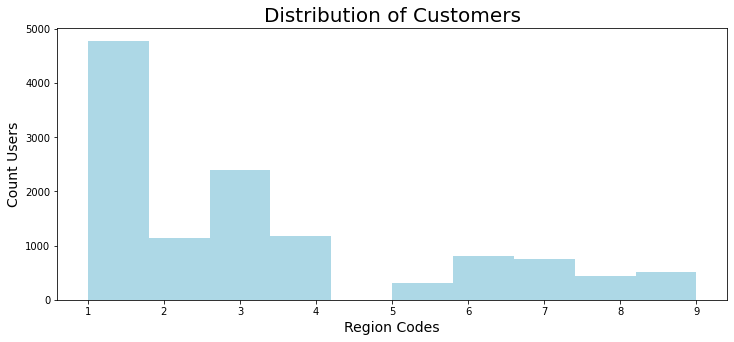

In [27]:
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

# Data Pre-Processing

Check missing values

In [34]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#counting total missing value
print('Counting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64
Counting total missing value:
0


Scaling data with MinMax

In [69]:
#list all the feature that need to be scaled  
scaling_column = ['Administrative',
                  'Administrative_Duration',
                  'Informational',
                  'Informational_Duration',
                  'ProductRelated',
                  'ProductRelated_Duration',
                  'BounceRates',
                  'ExitRates',
                  'PageValues',
                  'SpecialDay',
                  'OperatingSystems',
                  'Browser',
                  'Region',
                  'TrafficType']

#define MinMaxScaler as scaler  
scaler = MinMaxScaler()
#apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0
SpecialDay               0.0  1.0
OperatingSystems         0.0  1.0
Browser                  0.0  1.0
Region                   0.0  1.0
TrafficType              0.0  1.0


Convert string columns to numeric

In [70]:
#convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]


In [73]:
#convert feature/column 'Weekend'
LE = LabelEncoder()
dataset['Weekend'] = LE.fit_transform(dataset['Weekend'])
print(LE.classes_)
print(np.sort(dataset['Weekend'].unique()))

[False  True]
[0 1]


In [72]:
#convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

[0 1 2]
[0 1 2]


In [74]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,2,0.000000,0.000000,0.000,0.000000,2,0,False
1,0.0,0.0,0.0,0.0,0.002837,0.001000,0.00,0.50,0.0,0.0,2,0.142857,0.083333,0.000,0.052632,2,0,False
2,0.0,0.0,0.0,0.0,0.001418,0.000000,1.00,1.00,0.0,0.0,2,0.428571,0.000000,1.000,0.105263,2,0,False
3,0.0,0.0,0.0,0.0,0.002837,0.000042,0.25,0.70,0.0,0.0,2,0.285714,0.083333,0.125,0.157895,2,0,False
4,0.0,0.0,0.0,0.0,0.014184,0.009809,0.10,0.25,0.0,0.0,2,0.285714,0.166667,0.000,0.157895,2,1,False


# Data Modelling

Separate Revenue from dataset

In [81]:
#removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis=1)
#assigning the target column Revenue to y
y = dataset['Revenue']
#checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


Splitting dataset into train (80%) and test (20%) dataset

In [80]:
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# checking the shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (9864, 17)
Shape of y_train: (9864,)
Shape of X_test: (2466, 17)
Shape of y_test: (2466,)


# Train & Test Model with Decission Tree: Classification

In [118]:
#call the classifier
destree = DecisionTreeClassifier()
#fit the classifier to the training data
destree = destree.fit(X_train, y_train)

Apply classifier into testing data to predict training data

In [119]:
#predict training model
y_pred = destree.predict(X_test)
print(y_pred.shape)

(2466,)


Evaluate model performance

In [121]:
print('Training Accuracy :', destree.score(X_train, y_train))
print('Testing Accuracy :', destree.score(X_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8629359286293593


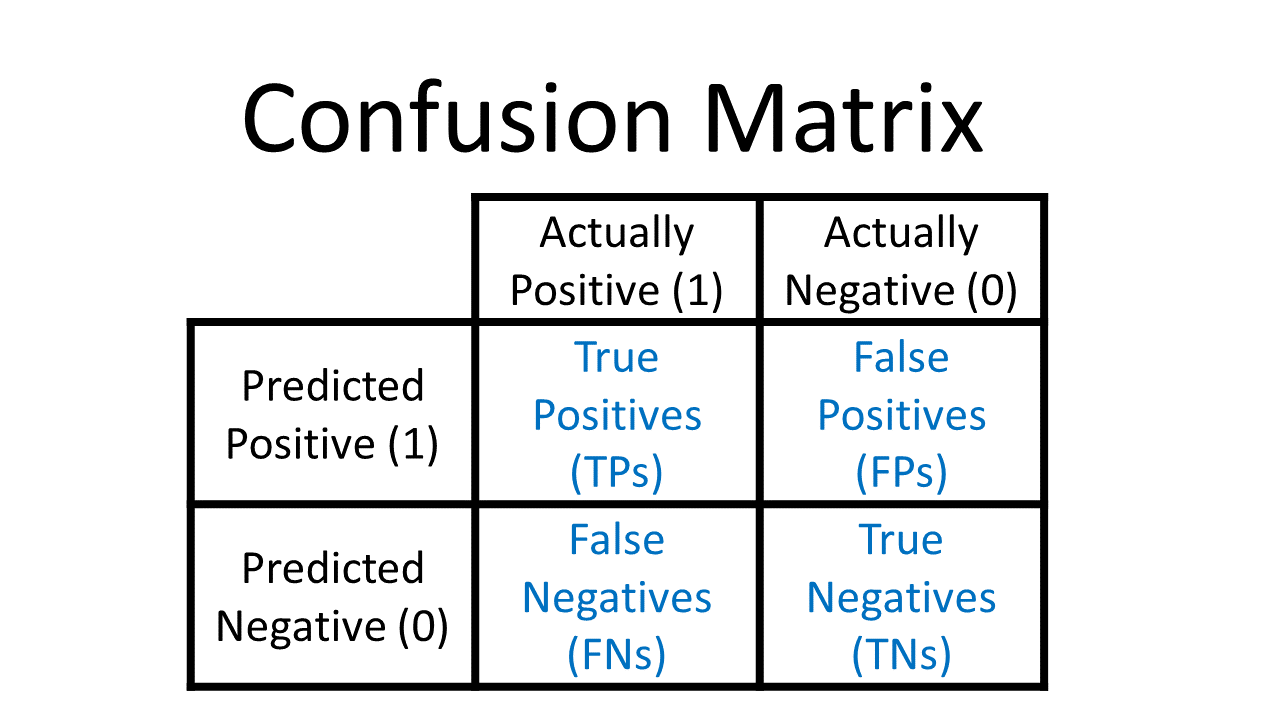

Revenue = [{False : 0, True : 1}]

True Positive (TP): If user is predicted to buy (1), and actually buys (1)

True Negative (FN): If user is predited to not buy (0), but actually buys (1)

False Positive (FP): If user is predicted to buy (1), but actually doesn't buy (0).

False Negatif (TN): If user is predicted to not buy (0), and actually doesn't buy (0).

In [122]:
print('Confusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion matrix:
[[1894  150]
 [ 188  234]]


Based on confusion matrix, we can measure metrics, as follow:

Accuracy = (TP+TN ) / (TP+FP+FN+TN)

Precision = (TP) / (TP+FP)

Recall = (TP) / (TP+FN)

F1 Score = 2 x (Recall x Precission) / (Recall + Precission)

We don't need to calculate this manually, just use `classification_report()` to see the metrics.

In [123]:
# classification report
print('Classification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.93      0.92      2044
        True       0.61      0.55      0.58       422

    accuracy                           0.86      2466
   macro avg       0.76      0.74      0.75      2466
weighted avg       0.86      0.86      0.86      2466



**Precision** tells us how many of the correctly predicted cases actually turned out to be positive. Precision is a useful metric in cases where False Positive is a higher concern than False Negative.

**Recall** tells us how many of the actual positive cases we were able to predict correctly with our model. Recall is a useful metric in cases where False Negative trumps False Positive.

**F1-score** is a harmonic mean of Precision and Recall, and so it gives a combined idea about these two metrics. It is maximum when Precision is equal to Recall.

If dataset has a balanced amount of False Negative and False Positive data (symmetric), then we can use Accuracy, but if it is not balanced, then we need to use F1-Score.

Conclusion:
**Recall** and **F1-scores** values are small for class `True` (buy) and quite high for class `False` (do not buy) indicate that the model tends to misclassify customers as not buying.

# Train & Test Model with Logistic Regression: Classification

In [125]:
#call the classifier
logreg = LogisticRegression()
#fit the classifier to the training data  
logreg = logreg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Apply classifier into testing data to predict training data

In [126]:
#predict testing model
y_pred = logreg.predict(X_test)
print(y_pred.shape)

(2466,)


Evaluate model performance

In [130]:
print('Training Accuracy :', logreg.score(X_train, y_train))  
print('Testing Accuracy :', logreg.score(X_test, y_test))

Training Accuracy : 0.880271695052717
Testing Accuracy : 0.856853203568532


Confusion matrix

In [131]:
print('Confusion matrix')  
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion matrix
[[2010   34]
 [ 319  103]]


Classification report

In [132]:
print('Classification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.75      0.24      0.37       422

    accuracy                           0.86      2466
   macro avg       0.81      0.61      0.64      2466
weighted avg       0.84      0.86      0.83      2466



# Train & Test Model with Random Forest: Classification

In [133]:
#call classifier
ranfost = RandomForestClassifier(n_estimators = 30,max_depth = 10,random_state = 101)
#fit the classifier to the training data
ranfost = ranfost.fit(X_train,y_train)

Apply classifier into testing data to predict training data

In [137]:
#predict testing model
y_pred = ranfost.predict(X_test)
print(y_pred.shape)

(2466,)


Evaluate model performance

In [138]:
print('Training Accuracy :', ranfost.score(X_train, y_train))  
print('Testing Accuracy :', ranfost.score(X_test, y_test))  

Training Accuracy : 0.9516423357664233
Testing Accuracy : 0.8937550689375506


Confusion matrix

In [139]:
print('Confusion matrix')  
cm = confusion_matrix(y_test, y_pred)
print(cm)

Confusion matrix
[[1976   68]
 [ 194  228]]


Classification report

In [140]:
print('Classification Report of Random Forest with no optimization')
print(classification_report(y_test, y_pred))

Classification Report of Random Forest with no optimization
              precision    recall  f1-score   support

       False       0.91      0.97      0.94      2044
        True       0.77      0.54      0.64       422

    accuracy                           0.89      2466
   macro avg       0.84      0.75      0.79      2466
weighted avg       0.89      0.89      0.89      2466



Optimization of the Random Forest Classifier using GridSearch

In [141]:
param_grid = {
    'n_estimators' : [60,100],
    'max_depth' : [10,15],
    'min_samples_leaf' : [2,4],
    'min_samples_split': [2,4]
}

gridsearch = GridSearchCV(estimator=ranfost,param_grid=param_grid,verbose = 1)
gridsearch.fit(X_train,y_train)
gridsearch.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [152]:
ranfost = RandomForestClassifier(n_estimators = 60, max_depth = 10, min_samples_leaf = 3, min_samples_split = 2, random_state = 101)
ranfost = ranfost.fit(X_train,y_train)
y_pred = ranfost.predict(X_test)
print('Confusion matrix\n', confusion_matrix(y_test, y_pred))  
print('\nClassification Report of Random Forest with optimization\n', classification_report(y_test, y_pred))

print('\nTraining Accuracy :', ranfost.score(X_train, y_train))  
print('Testing Accuracy :', ranfost.score(X_test, y_test))  

Confusion matrix
 [[1978   66]
 [ 188  234]]

Classification Report of Random Forest with optimization
               precision    recall  f1-score   support

       False       0.91      0.97      0.94      2044
        True       0.78      0.55      0.65       422

    accuracy                           0.90      2466
   macro avg       0.85      0.76      0.79      2466
weighted avg       0.89      0.90      0.89      2466


Training Accuracy : 0.9431265206812652
Testing Accuracy : 0.8969991889699919
